
# DESC SN Ia metric # 

This metric is contributed by Philipe Gris. The metric creates a SN population at a range of redshifts, looks for detections pre and post peak, and then evaluates the number of SN that constitute a complete sample out to a redshift value defined by how well the color covariance can be defined. 



In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [4]:
# Baseline Survey
baseline_file = get_baseline()
opsdb = maf.db.OpsimDatabase(baseline_file)
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

baseline_v2.1_10yrs


In [5]:
# Set up output
outDir = 'test_sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [6]:
#  Set up to time it at one point in the sky

plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 16
dustmap = maf.DustMap(nside=16)
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(n_bef=3, n_aft=8,
                         coadd_night=True, add_dust=False, hard_dust_cut=0.25,
                         zmin=0.1, zmax=0.5, 
                         zStep=0.03, daymaxStep=3.0, zlim_coeff=0.95,
                         gammaName="gamma_WFD.hdf5",verbose=False)  
bundle = maf.MetricBundle(metric, slicer, None, 
                          plotDict=plotDict, 
                          mapsList=[dustmap],
                          summaryMetrics=sn_summary)


bg = maf.MetricBundleGroup({'sn': bundle}, opsdb, outDir, resultsDb)


# Behind the scenes stuff to get the simulated data and set up the slicer so we can test ONE point
bg.setCurrent('')
bg.getData('')
simData = bg.simData
bundle.slicer.setupSlicer(simData)
# Add the dust extinction
slicer.slicePoints = dustmap.run(slicer.slicePoints)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/lynnej/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 63121 799 79
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 73508 799 92
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/lynnej/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 78302 799 98
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 88689 799 111
Querying table None with no constraint for columns ['visitTime', 'rotSkyPos', 'note', 'fieldRA', 'visitExposureTime', 'night', 'observationId', 'fiveSigmaDepth', 'observationStartMJD', 'numExposures', 'fieldDec', 'filter'].
Found 2081749 visits


In [7]:
# Find a good spot on the sky with lots of visits
lenvisits = []
for s in bundle.slicer:
    lenvisits.append(len(s['idxs']))
lenvisits = np.array(lenvisits)
x = np.where(lenvisits == np.max(lenvisits))[0][0]

bundle.slicer[x]

{'idxs': array([ 240354,  240404, 1282012, ..., 1201043,  643115,  643165]),
 'slicePoint': {'sid': 2593,
  'ra': 0.15707963267948966,
  'dec': -0.7852913518731985,
  'nside': 16,
  'gall': 5.44072959958684,
  'galb': -1.2543627336334444,
  'ebv': 0.01112323347479105}}

In [8]:
# sid = 890 - a point with a single usable season
sid = 2593
bundle.slicer[sid]

{'idxs': array([ 240354,  240404, 1282012, ..., 1201043,  643115,  643165]),
 'slicePoint': {'sid': 2593,
  'ra': 0.15707963267948966,
  'dec': -0.7852913518731985,
  'nside': 16,
  'gall': 5.44072959958684,
  'galb': -1.2543627336334444,
  'ebv': 0.01112323347479105}}

In [9]:
%%time

metric.run(simData[bundle.slicer[sid]['idxs']], bundle.slicer[sid]['slicePoint'])

CPU times: user 1min 31s, sys: 5.22 s, total: 1min 37s
Wall time: 8.95 s


rec.array([(82.533173, 0.276509)],
          dtype=[('nSN', '<f8'), ('zlim', '<f8')])

In [10]:
print(len(slicer) * 9/60/60/2, 'hrs best guess metric run time') # /2 because maybe half sky doesn't have visits

3.8400000000000003 hrs best guess metric run time


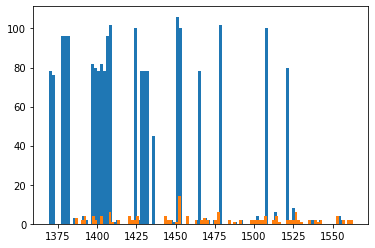

In [11]:
# Take a moment and create some metric test data
s = simData[bundle.slicer[2593]['idxs']]
s.sort(order='observationStartMJD')
dd = np.where(np.diff(s['night']) > 80)[0] + 1
o = s[dd[3]: dd[4]]
n,b,p= plt.hist(o['night'], bins=100)
o2 = o[np.where(o['note'] != 'DD:ELAISS1')]
n,b,p= plt.hist(o2['night'], bins=100)
o3 = o2.copy()
o3['fiveSigmaDepth'] = o3['fiveSigmaDepth'] - 4
len(o), len(o2)
o4 = o2.copy()
o4['numExposures'] = 1
o4['visitExposureTime'] = 20
o5 = o2.copy()
o5['numExposures'] = 1

In [12]:
pd.DataFrame(simData[bundle.slicer[2593]['idxs']]).to_hdf('test_simData.hdf', key='dense_pointing', mode='w')
pd.DataFrame(simData[bundle.slicer[890]['idxs']]).to_hdf('test_simData.hdf', key='sparse_pointing', mode='a')
pd.DataFrame(o2).to_hdf('test_simData.hdf', key='one_season_noDD', mode='a')
pd.DataFrame(o).to_hdf('test_simData.hdf', key='one_season_wDD', mode='a')
pd.DataFrame(o3).to_hdf('test_simData.hdf', key='one_season_shallow', mode='a')
pd.DataFrame(o4).to_hdf('test_simData.hdf', key='one_season_singleExp_20', mode='a')
pd.DataFrame(o5).to_hdf('test_simData.hdf', key='one_season_singleExp_30', mode='a')

In [14]:
%%time 
# -- this will run the whole sky, so could be close to the estimate above 
bg.runAll()

Querying table None with no constraint for columns ['visitTime', 'rotSkyPos', 'note', 'fieldRA', 'visitExposureTime', 'night', 'observationId', 'fiveSigmaDepth', 'observationStartMJD', 'numExposures', 'fieldDec', 'filter'].
Found 2081749 visits
Running:  ['sn']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
CPU times: user 1d 11h 5min 57s, sys: 1h 8min 37s, total: 1d 12h 14min 35s
Wall time: 3h 16min 10s


Plotting figures with "" constraint now.


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(


Plotting complete.


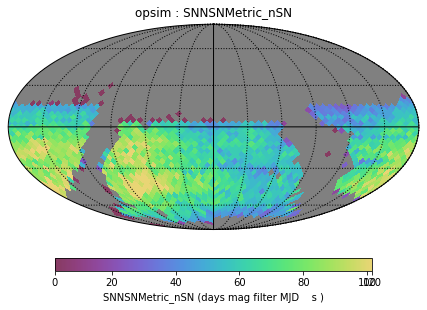

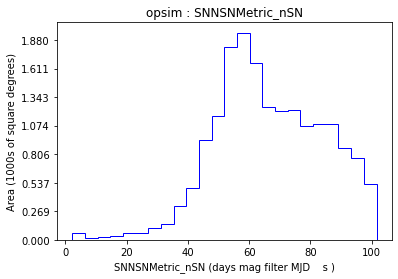

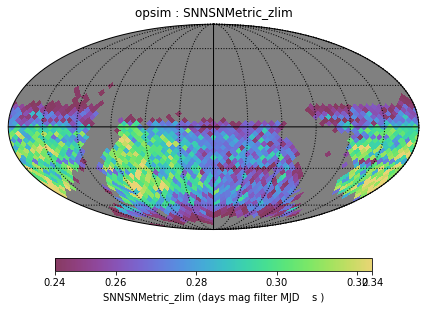

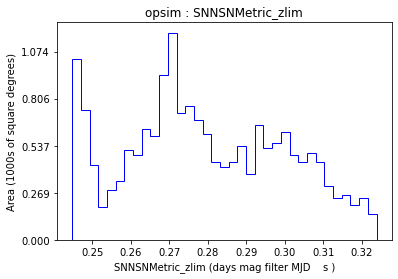

In [15]:
bg.plotAll(closefigs=False)

In [16]:
bundle.metricValues.compressed()[0]

rec.array([(0.26929, 0.18421)],
          dtype=[('nSN', '<f8'), ('zlim', '<f8')])

In [17]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
# (which is why we usually set this as a dictionary outside of the metricBundleGroup call .. whoops.
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x10b83cf40>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x1a30dc0d0>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x1a173e1c0>}

In [18]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
bdict['SNNSNMetric_nSN'].metricValues.compressed()[0:10]

array([ 0.26929 ,  1.332403,  1.623507,  0.707691,  1.451871,  0.919499,
       14.579998,  0.645324,  0.725694, 39.899104])

In [19]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()[0:10]

array([0.18421  , 0.245908 , 0.242578 , 0.245779 , 0.245587 , 0.24608  ,
       0.2438775, 0.245383 , 0.243651 , 0.245475 ])

In [20]:
for k in bdict:
    print(k, bdict[k].summaryValues)

sn {}
SNNSNMetric_nSN {'Median': 64.553104, 'Mean': 65.79330461674947, 'Total detected': 92702.76620499999}
SNNSNMetric_zlim {'Median': 0.276847, 'Mean': 0.2794387075940383, 'Total detected': 393.72913900000003}


In [21]:
runName = 'rolling_bulge_ns2_rw0.9_v2.0_10yrs'
opsdb = f'/Users/lynnej/opsim/v2.0/{runName}.db'

plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 16
dustmap = maf.DustMap(nside=16)
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(n_bef=3, n_aft=8,
                         coadd_night=True, add_dust=False, hard_dust_cut=0.25,
                         zmin=0, zmax=1.2, zStep=0.03, daymaxStep=3.0, zlim_coeff=0.95,
                         gammaName="gamma_WFD.hdf5",verbose=False)  
bundle2 = maf.MetricBundle(metric, slicer, None, 
                           runName=runName,
                          plotDict=plotDict, 
                          mapsList=[dustmap],
                          summaryMetrics=sn_summary)


bg = maf.MetricBundleGroup({'sn': bundle2}, opsdb, outDir, resultsDb)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


In [22]:
%%time
bg.runAll()

Querying table None with no constraint for columns ['visitTime', 'rotSkyPos', 'note', 'fieldRA', 'visitExposureTime', 'night', 'observationId', 'fiveSigmaDepth', 'observationStartMJD', 'numExposures', 'fieldDec', 'filter'].
Found 2087907 visits
Running:  ['sn']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
CPU times: user 1d 23h 6min 1s, sys: 1h 19min 23s, total: 2d 25min 25s
Wall time: 4h 37min 8s


In [23]:
bdict = bg.bundleDict.copy()
for k in bdict:
    print(k, bdict[k].summaryValues)

sn {}
SNNSNMetric_nSN {'Median': 63.420111, 'Mean': 63.94044027635328, 'Total detected': 89772.378148}
SNNSNMetric_zlim {'Median': 0.27359175, 'Mean': 0.2748266492165242, 'Total detected': 385.85661550000003}
